# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

## 2. Motivación

Ya la clase pasada habíamos mencionado que cuando se quería optimizar una función de varias variables con restricciones, se podía aplicar siempre el método de Multiplicadores de Lagrange. Sin embargo, este método es computacionalmente muy complejo conforme crece el número de variables.

Por tanto, cuando la función a optimizar y las restricciones son de caracter lineal, los métodos de solución que se pueden desarrollar son computacionalmente eficientes, por lo que es útil realizar la distinción.

## 3. Problemas de programación lineal

### 3.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto tiene que tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

#### Solución

Sean:
- $x_A$: la cantidad de gramos de A a ser producidas, y
- $x_B$: la cantidad de gramos de B a ser producidas en la semana.

Notar que lo que se quiere es minimizar $0.6x_A+0.2x_B$.

Restricciones:
1. El compuesto debe tener **al menos** $25 g$ de proteína: $30\%x_A+5\%x_B\geq 25 \Rightarrow 0.3x_A+0.05x_B\geq 25$.
2. El compuesto debe tener **al menos** $6 g$ de grasa: $1\%x_A+7\%x_B\geq 6 \Rightarrow 0.01x_A+0.07x_B\geq 6$.
3. El compuesto debe tener **al menos** $30 g$ de azúcares: $10\%x_A+10\%x_B\geq 30 \Rightarrow 0.1x_A+0.1x_B\geq 30$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

o, eqivalentemente 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^\top\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

Preferiremos, en adelante, la notación vectorial/matricial.

### 3.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

### 3.3. En general
De acuerdo a lo descrito anteriormente, un problema de programación lineal puede escribirse en la siguiente forma:

\begin{equation}
\begin{array}{ll}
\min_{x_1,\dots,x_n} & c_1x_1+\dots+c_nx_n \\
\text{s. a. }        & a^{eq}_{j,1}x_1+\dots+a^{eq}_{j,n}x_n=b^{eq}_j \text{ para } 1\leq j\leq m_1 \\
                     & a_{k,1}x_1+\dots+a_{k,n}x_n\leq b_k \text{ para } 1\leq k\leq m_2,
\end{array}
\end{equation}
donde:
- $x_i$ para $i=1,\dots,n$ son las incógnitas o variables de decisión,
- $c_i$ para $i=1,\dots,n$ son los coeficientes de la función a optimizar,
- $a^{eq}_{j,i}$ para $j=1,\dots,m_1$ e $i=1,\dots,n$, son los coeficientes de la restricción de igualdad,
- $a_{k,i}$ para $k=1,\dots,m_2$ e $i=1,\dots,n$, son los coeficientes de la restricción de desigualdad,
- $b^{eq}_j$ para $j=1,\dots,m_1$ son valores conocidos que deben ser respetados estrictamente, y
- $b_k$ para $k=1,\dots,m_2$ son valores conocidos que no deben ser superados.

Equivalentemente, el problema puede escribirse como

\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^\top\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
donde:
- $\boldsymbol{x}=\left[x_1\quad\dots\quad x_n\right]^\top$,
- $\boldsymbol{c}=\left[c_1\quad\dots\quad c_n\right]^\top$,
- $\boldsymbol{A}_{eq}=\left[\begin{array}{ccc}a^{eq}_{1,1} & \dots & a^{eq}_{1,n}\\ \vdots & \ddots & \vdots\\ a^{eq}_{m_1,1} & \dots & a^{eq}_{m_1,n}\end{array}\right]$,
- $\boldsymbol{A}=\left[\begin{array}{ccc}a_{1,1} & \dots & a_{1,n}\\ \vdots & \ddots & \vdots\\ a_{m_2,1} & \dots & a_{m_2,n}\end{array}\right]$,
- $\boldsymbol{b}_{eq}=\left[b^{eq}_1\quad\dots\quad b^{eq}_{m_1}\right]^\top$, y
- $\boldsymbol{b}=\left[b_1\quad\dots\quad b_{m_2}\right]^\top$.

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

#### Bueno, y una vez planteado, ¿cómo se resuelve el problema?

Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

In [1]:
#Importat numpy y matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Definir funciones de restricción y de costo
def res1(x1):
    return (300-2*x1)/7

def res2(x1):
    return (270-3*x1)/3

def f_costo(x1,x2):
    return 200*x1+600*x2

In [8]:
#Evaluar funciones
x1 = np.linspace(0,100,200)

R1 = res1(x1)
R2 = res2(x1)

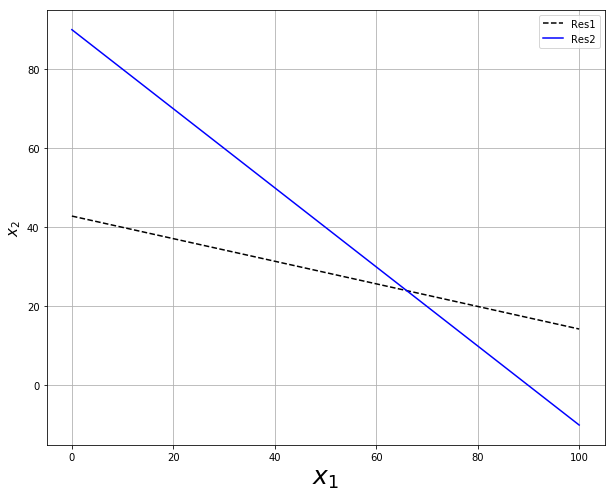

In [9]:
#Graficar
# Crear figura para graficar y definir el tamaño de la figura
plt.figure(figsize=(10,8))

#Graficar restricciones
plt.plot(x1,R1,'k--',label = 'Res1')
plt.plot(x1,R2,'b',label = 'Res2')

#Dar formato a la gráfica
plt.xlabel("$x_1$",fontsize=25)
plt.ylabel("$x_2$",fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

In [12]:
#Evaluar función de costo y comparar
f_costo(0,300/7), f_costo(270/3,0), f_costo(66,24)

(25714.285714285714, 18000.0, 27600)

In [ ]:
#Volver a graficar con solución


**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, pasará a explicarlo al tablero y le subiré la nota de alguna tarea a 100. Debe salir a explicar el problema.**

## 4. ¿Cómo se resuelve en python?

### 4.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

En particular, los siguientes son algunos de los paquetes básicos:
- `NumPy`
- `SymPy`
- `matplotlib`
- **Librería `SciPy`**
- `pandas`

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [ ]:
# Importar el módulo optimize de la librería scipy


El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices ($f(x)=0$). Entre ellas se encuentra la función `linprog`

In [ ]:
# Función linprog del módulo optimize


la cual resuelve problemas como los que aprendimos a plantear.

Parámetros importantes:
+ c: Vector con los coeficientes de función de costo (objetivo) lineal a minimizar.
+ A_ub: Matriz con los coeficientes de $x$ de la  restricción de desigualdad.
+ b_ub: Vector que representa los valores de cada restricción de desigualdad.
+ A_eq: Matriz con los coeficientes de $x$ de la  restricción de igualdad.
+ b_eq: Vector que representa los valores de cada restricción de igualdad.
+ bounds: (min, max) pares de cada elemento en $x$ definiendo las cotas mìnimas y màximas correspondientes. Por default $(0, None)$, no-negativo.

### 4.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`...

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

In [ ]:
# Importar numpy para crear las matrices


In [ ]:
# Crear las matrices para resolver el problema


In [ ]:
# Resolver utilizando linprog


In [ ]:
# Mostrar el resultado


In [ ]:
# Extraer el vector solución


**Conclusión**
- Para minimizar el costo del compuesto nutritivo basado en los productos $A$ y $B$, se debe producir $40$ gramos de $A$ y $260$ gramos de B.
- Con esa producción, el  costo total del compuesto será de $76$ u.m.

**Actividad.** Resolver el ejemplo de Mónica y sus ventas con `linprog`

In [ ]:
# Definir matrices


In [ ]:
# Resolver con el módulo linprog


In [ ]:
#Mostrar solución


## 5. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos factorías A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada factoría a cada centro distribuidor son los  indicados  en la tabla  siguiente: 

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_1 + x_2 + x_3 \leq 500$
- $x_4 + x_5 + x_6 \leq 400$

Restricciones del consumo:

- $x_1 + x_4 \geq 200$
- $x_2 + x_5 \geq 300$
- $x_3 + x_6 \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_1 + 60x_2 + 10x_3 + 25x_4 + 40x_5 + 20x_6$$

Resolver con `linprog`

In [ ]:
# Matrices y cotas


In [ ]:
# Resolver


In [ ]:
# Mostrar resultado


**Conclusión**

- La estrategia de menor costo es llevar $100$ unidades de la Factoría "A" al cento "D", $400$ unidades de la Factoría "A" al cento "E", $200$ unidades de la Factoría "B" al cento "C" y $200$ unidades de la Factoría "B" al cento "D". El costo total de esta estrategia de transporte es $23000$  u.m.

## 6. Optimización de inversión en bonos

**Referencia:**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

Plantear restricciones...

In [ ]:
# Matrices y cotas


In [ ]:
# Resolver


In [ ]:
# Mostrar resultado


Recordar que en el problema minimizamos $-\sum^{6}_{i=1} A_iR_i$. El rendimiento obtenido es entonces:

**Conclusión**

- 

## 7. Tarea 

### 7.1. Diseño de la Dieta Óptima

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en $100$ gramos, se deben tener **por lo menos** $8$ gramos de proteína y $6$ gramos de grasa. Así mismo, no se debe tener más de $2$ gramos de fibra y $0.4$ gramos de sal.  

Los datos nutricionales se pueden obtener de la siguiente tabla:

Ingrediente|Proteína|Grasa|Fibra|Sal
:----|----|----|----|----
Pollo|  10.0%|08.0%|00.1%|00.2%
Carne|  20.0%|10.0%|00.5%|00.5%
Cordero|15.0%|11.0%|00.5%|00.7%
Arroz|  00.0%|01.0%|10.0%|00.2%
Trigo|  04.0%|01.0%|15.0%|00.8%
Gel|    00.0%|00.0%|00.0%|00.0%

Los costos de cada producto son:

Ingrediente|Costo por gramo
:----|----
Pollo|$\$$0.013
Carne|$\$$0.008
Cordero|$\$$0.010
Arroz|$\$$0.002
Trigo|$\$$0.005
Gel|$\$$0.001    

Lo que se busca optimizar en este caso es la cantidad de productos que se debe utilizar en la comida de gato, minimizando el costo total. Para simplificar la notación use las siguientes variables: 

+ $x_1:$ Gramos de pollo  
+ $x_2:$ Gramos de carne  
+ $x_3:$ Gramos de cordero  
+ $x_4:$ Gramos de arroz  
+ $x_5:$ Gramos de trigo  
+ $x_6:$ Gramos de gel

La tarea consiste en plantear el problemade programación lineal que permita satisfacer las necesidades alimenticias del gato al tiempo que minimice el costo total y resolverlo con `linprog`.

### 7.2. Otro problema de distribución (de energía eléctrica)

La Comisión Federal de Electricidad **(CFE)** dispone de cuatro plantas de generación para satisfacer la demanda diaria eléctrica en cuatro ciudades, Guadalajara, León y Morelia. Las plantas $1$, $2$ y $3$ pueden satisfacer $80$, $40$ y $60$ millones de KW al día respectivamente. Las necesidades de las ciudades de Guadalajara, León y Morelia son de $70$, $40$ y $70$ millones de Kw al día respectivamente. 


Los costos asociados al envío de suministro energético por cada millón de Kw entre cada planta y cada ciudad son los registrados en la siguiente tabla. 

-|Guadalajara|León|Morelia
:----|----|----|----
Planta 1|5|2|7
Planta 2|3|6|6
Planta 3|6|1|2

Y por último, las restricciones del problema, van a estar dadas por las capacidades de oferta y demanda de cada planta (en millones de KW) y cada ciudad.

Para simplificar la notación use las siguientes variables:

+ $x_1$: Kw (en millones) distribuidos de la Planta 1 a Guadalajara
+ $x_2$: Kw (en millones) distribuidos de la Planta 1 a León
+ $x_3$: Kw (en millones) distribuidos de la Planta 1 a Morelia
+ $x_4$: Kw (en millones) distribuidos de la Planta 2 a Guadalajara
+ $x_5$: Kw (en millones) distribuidos de la Planta 2 a León
+ $x_6$: Kw (en millones) distribuidos de la Planta 2 a Morelia
+ $x_7$: Kw (en millones) distribuidos de la Planta 3 a Guadalajara
+ $x_8$: Kw (en millones) distribuidos de la Planta 3 a León
+ $x_9$: Kw (en millones) distribuidos de la Planta 3 a Morelia

La tarea consiste en plantear el problema de programación lineal que permita satisfacer las necesidades de todas las ciudades al tiempo que minimice los costos asociados a la distribución y resolverlo con `linprog`.

Deben crear un notebook de jupyter (archivo .ipynb) y llamarlo PrimerApellido_PrimerNombre, y subirlo a moodle.

**Definir fecha**

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga
</footer>